# Iris ANN

## Importing Required Libraries

In [79]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
X.shape, y.shape

((150, 4), (150,))

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Data Preprocessing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)
X_train.shape, X_test.shape

((120, 4), (30, 4))

### Data Normalization
- using standard scaler

In [6]:
std_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(std_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [7]:
X_train_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,-1.475436,0.112318,-1.252704,-1.287052
146,0.537868,-1.213402,0.726738,0.957038
79,-0.172710,-0.992448,-0.121594,-0.231009
40,-1.001718,0.996131,-1.365815,-1.155046
136,0.537868,0.775178,1.066071,1.617065


## ANN
- Input layer: 4 neurons (4 features)
- Hidden layer: 10 neurons (ReLU)
- Output layer: 3 neurons (softmax)
- Adam optimizer
- Categorical cross entropy loss
- Train model for 50 epochs with batch size as 32.
- Use test set to monitor the model's performance during training

### Sklearn - MLP Classifier

In [55]:
clf = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation="relu",
    solver="adam",
    max_iter=50,
    batch_size=32,
    random_state=37
)
clf.fit(X_train_scaled, y_train)

D:\Cache\conda\envs\torch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(10,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,37


In [56]:
y_preds_clf = clf.predict(X_test_scaled)
print(classification_report(y_test, y_preds_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.75      0.86         8
           2       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.96      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [57]:
def print_summary(clf):
    print(f"Number of layers: {clf.n_layers_}")
    print(f"Hidden layer sizes: {clf.hidden_layer_sizes}")
    print(f"Output classes: {clf.classes_}")

    total_params = 0
    for i, (w, b) in enumerate(zip(clf.coefs_, clf.intercepts_), start=1):
        print(f"Layer {i} weights shape: {w.shape}")
        print(f"Layer {i} bias shape: {b.shape}")
        total_params += w.size + b.size
    print(f"Total parameters: {total_params}")

In [58]:
print_summary(clf)

Number of layers: 3
Hidden layer sizes: (10,)
Output classes: [0 1 2]
Layer 1 weights shape: (4, 10)
Layer 1 bias shape: (10,)
Layer 2 weights shape: (10, 3)
Layer 2 bias shape: (3,)
Total parameters: 83


#### ANN 2
- Input layer: 4 neurons (4 features)
- Hidden layer 1: 15 neurons (ReLU)
- Hidden layer 2: 30 neurons (ReLU)
- Hidden layer 3: 5 neurons (ReLU)
- Output layer: 3 neurons (softmax)

In [79]:
clf2 = MLPClassifier(
    hidden_layer_sizes=(15, 30, 5),
    activation="relu",
    solver="adam",
    max_iter=50,
    batch_size=32,
    random_state=37
)
clf2.fit(X_train_scaled, y_train)

D:\Cache\conda\envs\torch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(15, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,37


In [80]:
y_preds_clf2 = clf2.predict(X_test_scaled)
print(classification_report(y_test, y_preds_clf2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [81]:
print_summary(clf2)

Number of layers: 5
Hidden layer sizes: (15, 30, 5)
Output classes: [0 1 2]
Layer 1 weights shape: (4, 15)
Layer 1 bias shape: (15,)
Layer 2 weights shape: (15, 30)
Layer 2 bias shape: (30,)
Layer 3 weights shape: (30, 5)
Layer 3 bias shape: (5,)
Layer 4 weights shape: (5, 3)
Layer 4 bias shape: (3,)
Total parameters: 728


## Torch

In [32]:
device = torch.device("cuda:0")

In [9]:
X_train_tensor = torch.tensor(X_train_scaled.to_numpy(), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long).to(device)

In [10]:
X_train_tensor[:5, :]

tensor([[-1.4754,  0.1123, -1.2527, -1.2871],
        [ 0.5379, -1.2134,  0.7267,  0.9570],
        [-0.1727, -0.9924, -0.1216, -0.2310],
        [-1.0017,  0.9961, -1.3658, -1.1550],
        [ 0.5379,  0.7752,  1.0661,  1.6171]], device='cuda:0')

In [33]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

In [34]:
model1 = ANN().to(device)
model1

ANN(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)

In [13]:
summary(model1, input_size=(32, 4))

Layer (type:depth-idx)                   Output Shape              Param #
ANN1                                     [32, 3]                   --
├─Linear: 1-1                            [32, 10]                  50
├─ReLU: 1-2                              [32, 10]                  --
├─Linear: 1-3                            [32, 3]                   33
├─Softmax: 1-4                           [32, 3]                   --
Total params: 83
Trainable params: 83
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters())
epochs = 50
for epoch in range(1, epochs+1):
    model1.train()
    optimizer.zero_grad()                      # clear old gradients

    outputs = model1(X_train_tensor)           # forward pass
    loss = criterion(outputs, y_train_tensor)  # calculate loss

    loss.backward()                            # Backpropagation
    optimizer.step()                           # update weights

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss: {loss.item():.4f}")

Epoch 10: Loss: 1.0927
Epoch 20: Loss: 1.0809
Epoch 30: Loss: 1.0681
Epoch 40: Loss: 1.0540
Epoch 50: Loss: 1.0385


In [15]:
model1.eval()
y_preds = []
with torch.no_grad():
    logits = model1(X_test_tensor)
    preds = torch.argmax(logits, dim=1)
    y_preds.extend(preds.cpu())
    acc = (preds == y_test_tensor).float().mean().item() * 100
    print(f"Test accuracy: {acc:.2f}%")

Test accuracy: 53.33%


In [16]:
print(classification_report(y_test_tensor.cpu(), y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.31      0.62      0.42         8
           2       0.79      0.85      0.81        13

    accuracy                           0.53        30
   macro avg       0.37      0.49      0.41        30
weighted avg       0.42      0.53      0.46        30



D:\Cache\conda\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Cache\conda\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Cache\conda\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Torch Iris ANN
- data loader
- multiple ANNs
- using a workflow

### Data Loader

In [40]:
class IrisDataset(Dataset):
    def __init__(self, X, y):
        global device
        if device is None:
            device = torch.device("cuda:0")
        self.X = torch.tensor(X.to_numpy(), dtype=torch.float32).to(device)
        self.y = torch.tensor(y.to_numpy(), dtype=torch.long).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [41]:
train_ds = IrisDataset(X_train_scaled, y_train)
test_ds = IrisDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

### ANNs

In [57]:
class ANN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.net(x)


class ANN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 15),
            nn.ReLU(),
            nn.Linear(15, 30),
            nn.ReLU(),
            nn.Linear(30, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.net(x)


class ANN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 15),
            nn.ReLU(),
            nn.Linear(15, 30),
            nn.ReLU(),
            nn.Linear(30, 5),
            nn.ReLU(),
            nn.Linear(5, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.net(x)

### Workflow

In [66]:
def train_and_evaluate(model_cls, train_loader, test_loader, epochs=50, verbose=True):
    global device
    if device is None:
        device = torch.device("cuda:0")

    model = model_cls().to(device)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    if verbose:
        print(summary(model, input_size=(32, 4)))

    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            optimizer.zero_grad()                 # clear old gradients
            outputs = model(batch_X)              # forward pass
            loss = criterion(outputs, batch_y)    # compute loss
            loss.backward()                       # Backpropagation
            optimizer.step()                      # update weights

        if verbose and (epoch+1) % 10 == 0:
            print(f"Epoch: {epoch+1} Loss: {loss.item():.4f}")

    model.eval()
    y_true, y_preds = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            outputs = model(batch_X)              # output probs
            preds = torch.argmax(outputs, dim=1)  # predictions
            y_true.extend(batch_y.cpu())
            y_preds.extend(preds.cpu())

    report = classification_report(y_true, y_preds, digits=3, zero_division=0)
    print(report)
    return y_true, y_preds, report

In [70]:
models = {
    "ANN1 (4-10-3)": ANN1,
    "ANN2 (4-15-30-3)": ANN2,
    "ANN3 (4-15-30-5-3)": ANN3
}

outputs = {}

for name, model_cls in models.items():
    print(f"\n===== Evaluating: {name} =====")
    y_true, y_preds, report = train_and_evaluate(model_cls, train_loader, test_loader)
    outputs[name.split()[0]] = (y_true, y_preds)


===== Evaluating: ANN1 (4-10-3) =====
Layer (type:depth-idx)                   Output Shape              Param #
ANN1                                     [32, 3]                   --
├─Sequential: 1-1                        [32, 3]                   --
│    └─Linear: 2-1                       [32, 10]                  50
│    └─ReLU: 2-2                         [32, 10]                  --
│    └─Linear: 2-3                       [32, 3]                   33
│    └─Softmax: 2-4                      [32, 3]                   --
Total params: 83
Trainable params: 83
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
Epoch: 10 Loss: 1.0246
Epoch: 20 Loss: 0.9515
Epoch: 30 Loss: 0.8848
Epoch: 40 Loss: 0.8063
Epoch: 50 Loss: 0.8860
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.875     0.875     0

In [95]:
def plot_confusion_matrix(y_true, y_preds, title, *, cmap="Blues"):
    cm = confusion_matrix(y_true, y_preds)
    iris_targets = load_iris().target_names
    ConfusionMatrixDisplay(cm, display_labels=iris_targets).plot(cmap=cmap)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

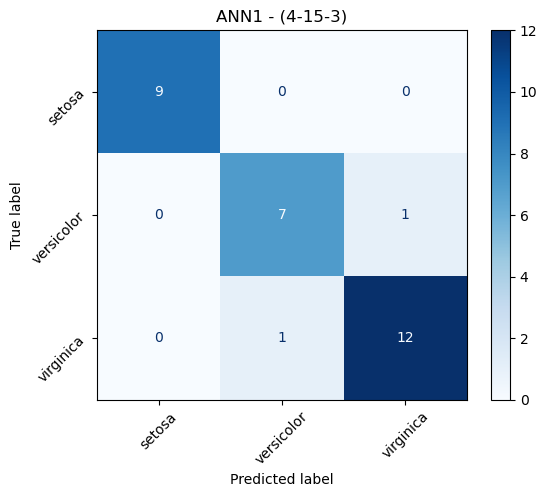

In [96]:
plot_confusion_matrix(*outputs["ANN1"], "ANN1 - (4-15-3)")

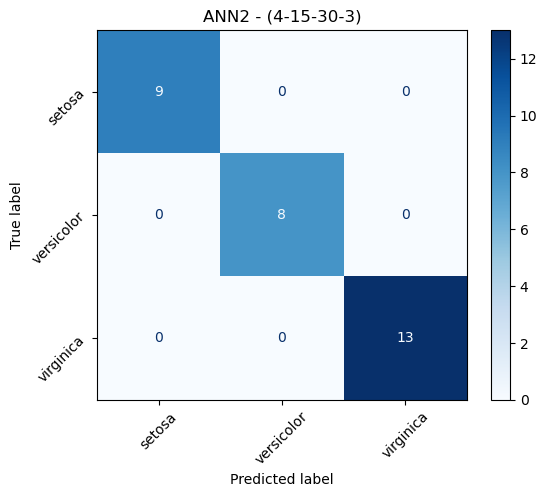

In [97]:
plot_confusion_matrix(*outputs["ANN2"], "ANN2 - (4-15-30-3)")

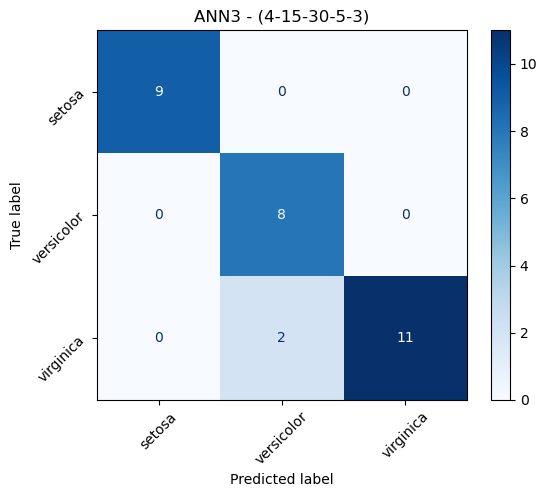

In [99]:
plot_confusion_matrix(*outputs["ANN3"], "ANN3 - (4-15-30-5-3)")